# Gradient boosting 


Gradient boosting regression trees are based on the idea of an ensemble method derived from a decision tree. The decision tree uses a tree structure. Starting from tree root, branching according to the conditions and heading toward the leaves, the goal leaf is the prediction result. This decision tree has the disadvantage of overfitting test data if the hierarchy is too deep. As a means to prevent this overfitting, the idea of the ensemble method is used for decision trees. This technique uses a combination of multiple decision trees rather than simply a single decision tree. Gradient boosting is a technique for repeatedly adding decision trees so that the next decision tree corrects the previous decision tree error. 

![image](./Images/gradient_boost.png)

In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA


In [10]:
# import test and train data
train_f = pd.read_csv('./Data/kc_pp_train_features.csv')
train_l = pd.read_csv('./Data/kc_pp_train_labels.csv')
test_f = pd.read_csv('./Data/kc_pp_test_features.csv')
test_l = pd.read_csv('./Data/kc_pp_test_labels.csv')
train_f = train_f.drop(['date'], axis=1)
test_f = test_f.drop(['date'], axis=1)
train_l = train_l['price']
test_l = test_l['price']
#Normalize the prices
train_l = (train_l-train_l.min())/(train_l.max()-train_l.min())
test_l = (test_l-test_l.min())/(test_l.max()-test_l.min())


In [7]:
# Regressor
gbr = GradientBoostingRegressor(n_estimators=1500, max_depth=3, random_state=42)
gbr.fit(train_f, train_l)
print("Gradient Boosting R^2 Score: ", gbr.score(train_f, train_l))
print("Gradient Boosting Test R^2 Score: ", gbr.score(test_f, test_l))
y_pred = gbr.predict(test_f)
print("Root Mean Squared Error: ", mean_squared_error(test_l, y_pred, squared=False))
print("Mean Absolute Error: ", mean_absolute_error(test_l, y_pred))
print("Cross Validation Score: ", cross_val_score(gbr, test_f, test_l, cv=5))

Gradient Boosting R^2 Score:  0.9427574620384307
Gradient Boosting Test R^2 Score:  0.885025818179688
Root Mean Squared Error:  0.05887413563628636
Mean Absolute Error:  0.03979313102568225
Cross Validation Score:  [0.87139232 0.83251539 0.84368604 0.86212591 0.84898367]


In [19]:
# hypertune parameters
params = {'n_estimators':[500, 1000, 1500, 2000], 'max_depth':[3, 5, 8]}
gbr = GradientBoostingRegressor()
gbr_grid = GridSearchCV(gbr, params, cv=5)
gbr_grid.fit(train_f, train_l)
print("Grid Search Gradient Boosting Score: ", gbr_grid.score(train_f, train_l))
print("Grid Search Gradient Boosting Test Score: ", gbr_grid.score(test_f, test_l))
print("Grid Search Gradient Boosting Best Parameters: ", gbr_grid.best_params_)

Grid Search Gradient Boosting Score:  0.9427574620384306
Grid Search Gradient Boosting Test Score:  0.8856303033424798
Grid Search Gradient Boosting Best Parameters:  {'max_depth': 3, 'n_estimators': 1500}


<AxesSubplot: >

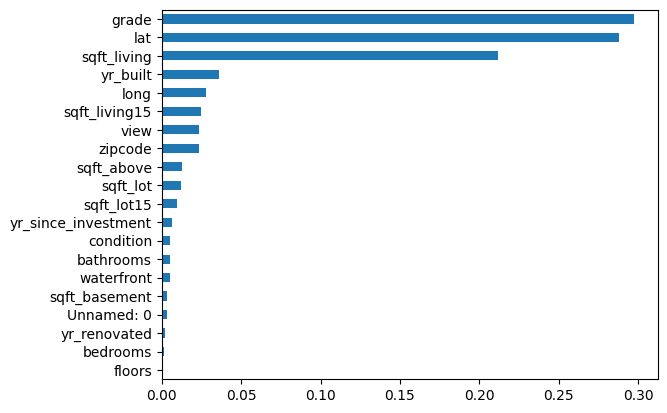

In [6]:
# evaluate feature importance and update feauture table - might be moved to different block for automatic evaluation later
feat_importances = pd.Series(gbr.feature_importances_, index = train_f.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')